In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
! cargo run --example fig1a --release > fig1a.csv

    Blocking waiting for file lock on build directory
   Compiling wang-buzsaki v0.1.0 (C:\Rust\codes\CA3-Rust\wang-buzsaki)
    Finished release [optimized] target(s) in 3.52s
     Running `target\release\examples\fig1a.exe`


In [3]:
df = pd.read_csv("fig1a.csv", index_col=0)
df.columns

Index(['0_V(mV)', '1_V(mV)', '2_V(mV)', '3_V(mV)', '4_V(mV)', '5_V(mV)',
       '6_V(mV)', '7_V(mV)', '8_V(mV)', '9_V(mV)', '10_V(mV)', '11_V(mV)',
       '12_V(mV)', '13_V(mV)', '14_V(mV)', '15_V(mV)', '16_V(mV)', '17_V(mV)',
       '18_V(mV)', '19_V(mV)', '20_V(mV)'],
      dtype='object')

In [4]:
def hz(arr):
    ans = 0
    flg = False
    for v in arr:
        if not flg and v > -20:
            ans += 1
        if v > -20:
            flg = True
        else:
            flg = False
    return ans

In [5]:
x = np.arange(0, 21)

In [6]:
y = np.array([hz(df[n]) for n in df.columns])

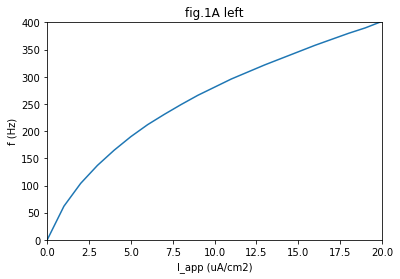

In [7]:
plt.plot(x, y)
plt.xlim([0, 20])
plt.ylim([0, 400])
plt.xlabel("I_app (uA/cm2)")
plt.ylabel("f (Hz)")
plt.title("fig.1A left")
plt.savefig("fig1AL.png")

In [8]:
x2 = np.arange(0, 20)

In [9]:
y2 = [y[i+1] - y[i] for i in range(20)]

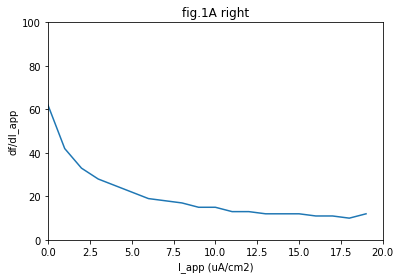

In [10]:
plt.plot(x2, y2)
plt.xlim([0, 20])
plt.ylim([0, 100])
plt.xlabel("I_app (uA/cm2)")
plt.ylabel("df/dI_app")
plt.title("fig.1A right")
plt.savefig("fig1AR.png")